In [1]:
### 1. Import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
### 2. Import cleaned 'Chocolate bar rating 2022' dataset 

df = pd.read_csv(r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /6.4/choc_bar_rating_clean_newversion.csv', index_col = False)

In [4]:
path = '/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /6.4'

In [7]:
### 3. Data cleaninng 

df.head(20)

,Unnamed: 0.1,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Year,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,1,1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2,2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
3,3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,4,4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie, macadamia,chewy",3.50
5,5,5,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
6,6,6,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
7,7,7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50
8,8,8,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75
9,9,9,1011,A. Morin,France,2013,Panama,Panama,70.0,"4- B,S,C,L","brief fruit note, earthy, nutty",2.75


In [6]:
df.shape

(2588, 12)

In [15]:
# Drop categorical columns as not useful for the next steps of the analysis

Dropcolumns = ['Unnamed: 0.1', 'Unnamed: 0', 'Company (Manufacturer)', 'Company Location', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Ingredients','Most Memorable Characteristics']

In [16]:
df_num_col = df.drop(columns=Dropcolumns)

In [17]:
df_num_col

,REF,Review Year,Cocoa Percent,Rating
0,2454,2019,76.0,3.25
1,2454,2019,76.0,3.75
2,2458,2019,76.0,3.50
3,2542,2021,68.0,3.00
4,2542,2021,68.0,3.50
...,...,...,...,...
2583,1205,2014,80.0,2.75
2584,1996,2017,75.0,3.75
2585,2036,2018,75.0,3.00
2586,2170,2018,70.0,3.25


In [22]:
### 4. The elbow technique

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines the range of potential clusters in the data

In [20]:
num_cl

range(1, 10)

In [25]:
# Creates a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_num_col ).score(df_num_col) for i in range(len(kmeans))]


/Users/melissatoure/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/melissatoure/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/melissatoure/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/melissatoure/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

In [26]:
score

[-1549341879.5256705,
 -411646379.20513046,
 -179744687.21526027,
 -103252309.15554902,
 -64249766.824001506,
 -44873837.52590361,
 -32859586.269711684,
 -25867366.171385013,
 -20225290.892521642]

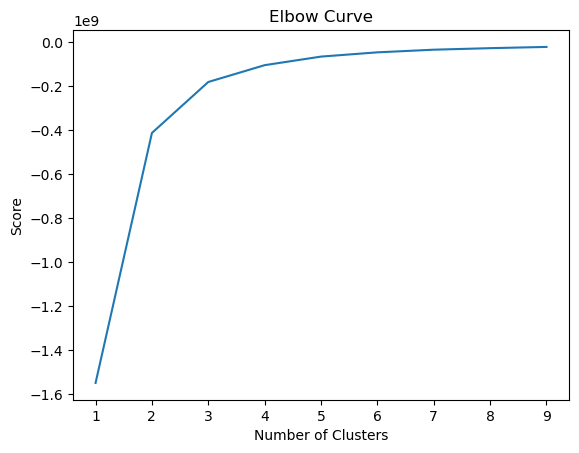

In [27]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() # Based on the elbow curve, we can see that it jumps rapidly from two to four on the x-axis, then rises only slightly after four. This means that the optimal count for your clusters is four.

In [32]:
### 5. k-means clustering

# Create the k-means object

kmeans = KMeans(n_clusters = 4, n_init=10)

In [33]:
# Fit the k-means object to the data

kmeans.fit(df_num_col)

KMeans(n_clusters=4, n_init=10)

In [34]:
# Adding clusters column to a dataframe

df_num_col['clusters'] = kmeans.fit_predict(df_num_col)

In [35]:
df_num_col.head() # Check on new column for clusters

,REF,Review Year,Cocoa Percent,Rating,clusters
0,2454,2019,76.0,3.25,3
1,2454,2019,76.0,3.75,3
2,2458,2019,76.0,3.50,3
3,2542,2021,68.0,3.00,3
4,2542,2021,68.0,3.50,3


In [36]:
df_num_col['clusters'].value_counts()

0    697
3    691
2    639
1    561
Name: clusters, dtype: int64

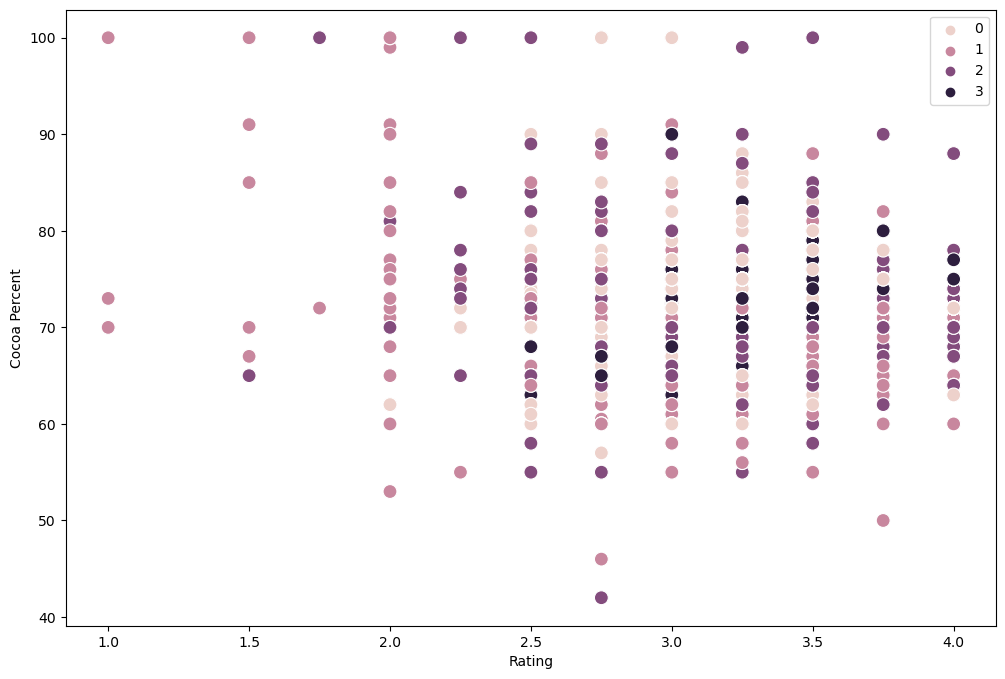

In [37]:
### 6. Plot the clusters 

# 'rating' vs 'Cocoa percent'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_col['Rating'], y=df_num_col['Cocoa Percent'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Rating')
plt.ylabel('Cocoa Percent')
plt.show()

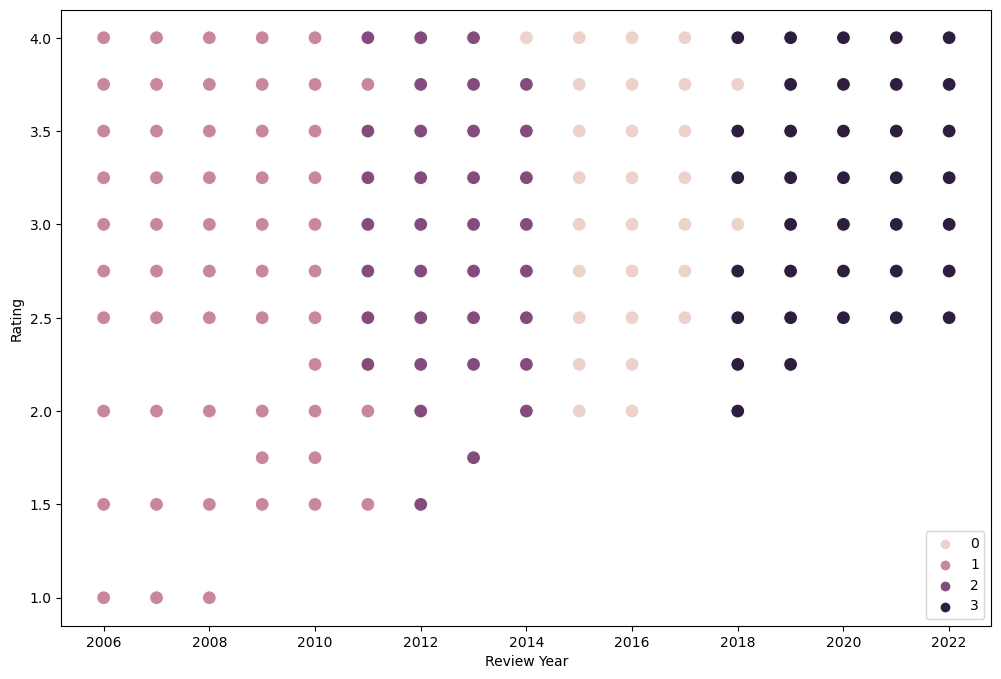

In [38]:
# 'rating' vs 'Review Year'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_col['Review Year'], y=df_num_col['Rating'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Review Year')
plt.ylabel('Rating')
plt.show()


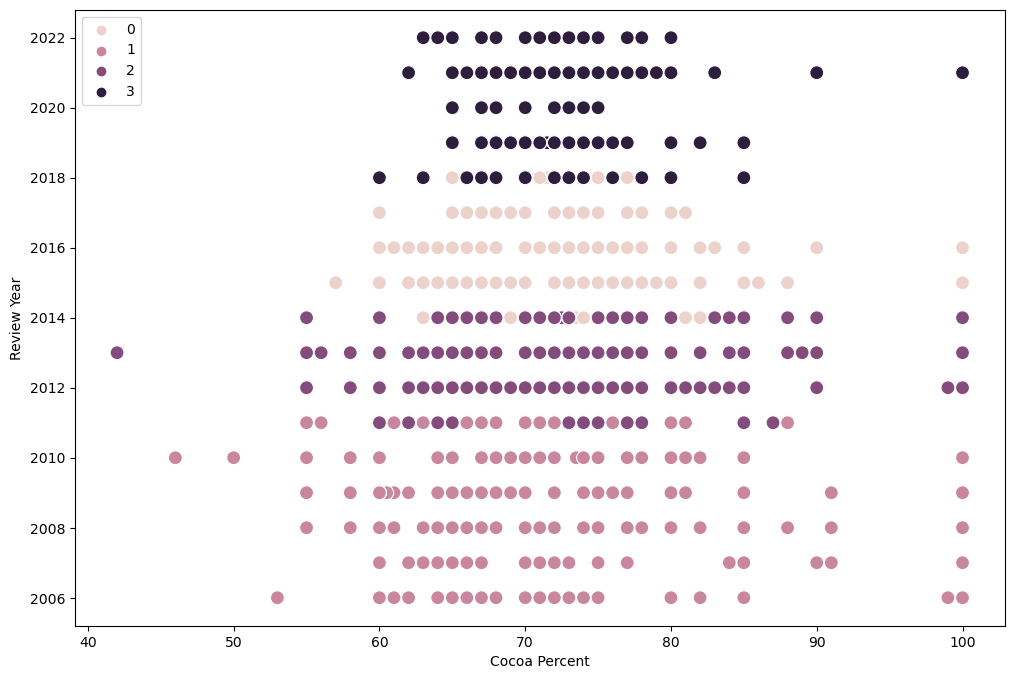

In [44]:
# 'Cocoa percent' vs 'Review Year'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_col['Cocoa Percent'], y=df_num_col['Review Year'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Cocoa Percent')
plt.ylabel('Review Year')
plt.show()

In [ ]:
### Clustering make sense for the year as it seems that it clustered per year for the two last charts. However, it does not make much sense in the fisrt chart colors are being scaterred and clustered on one to another making the analysis difficult. 

In [51]:
### 7. Descriptive Statistics

#rename clusters
df_num_col.loc[df_num_col['clusters'] == 3, 'cluster'] = 'dark purple'
df_num_col.loc[df_num_col['clusters'] == 2, 'cluster'] = 'purple'
df_num_col.loc[df_num_col['clusters'] == 1, 'cluster'] = 'pink'
df_num_col.loc[df_num_col['clusters'] == 0, 'cluster'] = 'light pink'

In [52]:
df_num_col.groupby('clusters').agg({'Review Year':['mean', 'median'],'Cocoa Percent':['mean', 'median'],'Rating':['mean', 'median']})
                   
                       

Review Year         Cocoa Percent           Rating       
                 mean  median          mean median      mean median
clusters                                                           
0         2015.734577  2016.0     71.804878   70.0  3.242468   3.25
1         2008.800357  2009.0     71.160428   70.0  3.095811   3.00
2         2012.815336  2013.0     71.937402   70.0  3.210094   3.25
3         2019.609262  2019.0     71.486975   70.0  3.226122   3.25

In [ ]:
### 8. Insights and propose what these results could be useful for in future steps of an analytics pipeline

# Overall, the number of the clusters do not differs too much, except for the year. It shows then that the overall scores were slightly lower in around 2008/9 comparing to the other years. It actually match the chart above in which we can see that ratings have improved over the years. 
# The pink cluster has a lightly lower value (around 3.09 mean) than the other cluster, which are more similar (around in the 3.20s). 
# For the cocoa percent, the values are almost similar as well for the mean and similar in each cluster for the median. This might be the result to the fact that most of the ratings has been done in the range of 70%/80%. It shows the limitations and bias of the dataset.
# Based on the results, the insights gathered are quite light. Further analysis on other variables might lead to better understanding of the data. Also explore the evolution of those variables over times, to identify any anomalies or trends or evolution might be future steps in the analysis.



